## Análisis de velocidad y aceleración de mecanismo Manivela-balancín

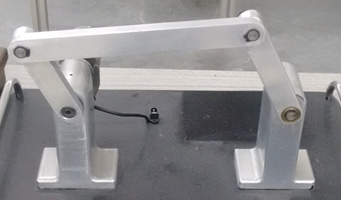

## Análisis vectorial

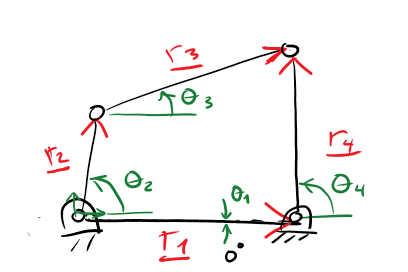

Partiendo de este diagrama vectorial, podemos obtener la siguiente ecuación vectorial

$\overrightarrow{r_{2}}+\overrightarrow{r_{3}}-\overrightarrow{r_{4}}-\overrightarrow{r_{1}}=0$ (1)

cuyas ecuaciones escalares correspondientes son

$r2\cdot cos(\theta_{2})+r3\cdot cos(\theta_{3})-r4\cdot cos(\theta_{4})-r1\cdot cos(\theta_{1})=0$, (2)

$r2\cdot sin(\theta_{2})+r3\cdot sin(\theta_{3})-r4\cdot sin(\theta_{4})-r1\cdot sin(\theta_{1})=0$ (3)

En este cuaderno desarrollaremos el análisis de velocidad y aceleración. Para esto debemos contar con el análisis de posición correctamente desarrollado.

Para ver este desarrollo con las anotaciones correspondientes:

### [Análisis Cinemático de Mecanismo Manivela Balancín](https://github.com/luismiguelaristi/MecanismosPythonUPB/blob/main/01b_ManivelaBalancin/Manivela%20Balancin_MetodosNumericos.ipynb)

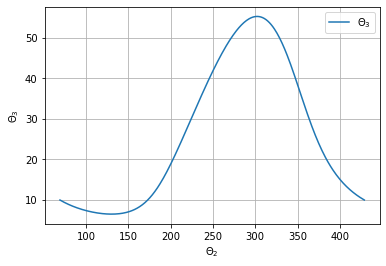

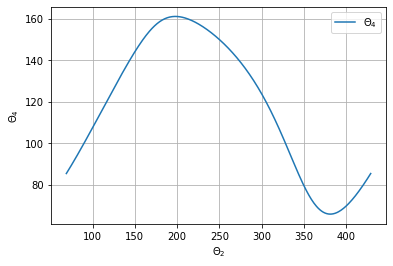

In [1]:
%reset -sf

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

from matplotlib.animation import FuncAnimation

def manivela_balancin(x0):
    # var secundarias
    th3,th4 = x0

    return [r2*np.cos(th2) + r3*np.cos(th3) - r4*np.cos(th4) - r1*np.cos(th1),
            r2*np.sin(th2) + r3*np.sin(th3) - r4*np.sin(th4) - r1*np.sin(th1)]

# Parámetros
r2 = 70
r3 = 170
r4 = 95 
r1 = 185 
th1 = 0

# Declaramos las condiciones iniciales
th2 = np.deg2rad(69)

th3 = np.deg2rad(17)
th4 = np.deg2rad(87)

x0 = [th3,th4]

numpos = 360

th2v = np.linspace(th2,th2 + 2*np.pi,numpos)
th3v = []
th4v = []

for th2 in th2v:
    (th3,th4),info,exitflag,mensaje = fsolve(manivela_balancin,
                                        x0, 
                                        full_output = True)
    th3v.append(th3)
    th4v.append(th4)
    x0 = [th3,th4]
    if exitflag != 1:
        print('Error en th2 = ',th2)
        numpos = len(th3v)
        th2v = th2v[0:numpos]
        break

    
plt.figure()
plt.plot(np.rad2deg(th2v),np.rad2deg(th3v))
plt.legend(["$\Theta_3$"])
plt.xlabel("$\Theta_2$")
plt.ylabel("$\Theta_3$")
plt.grid()
plt.figure()
plt.plot(np.rad2deg(th2v),np.rad2deg(th4v))
plt.legend(["$\Theta_4$"])
plt.xlabel("$\Theta_2$")
plt.ylabel("$\Theta_4$")
plt.grid()

## Análisis de velocidad: teoría

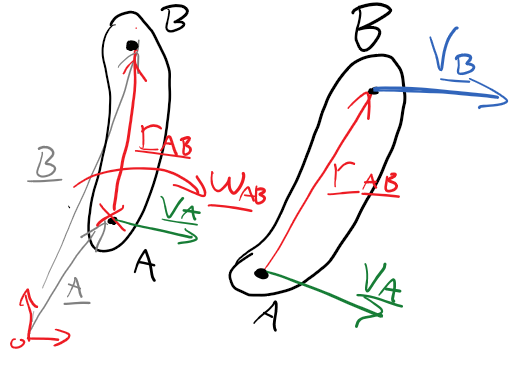

Aplicaremos la siguiente ecuación para modelar la velocidad de cada cuerpo rígido (barra) del mecanismo:

$\overrightarrow{V_B} = \overrightarrow{V_A}+\overrightarrow{\omega}\times \overrightarrow{r_{AB}}$, (4)

Donde $\overrightarrow{\omega}$ es el vector de velocidad angular de la barra analizada.

Usualmente no tenemos el valor de $\overrightarrow{\omega}$, ya que las componentes escalares de esta son

$\overrightarrow{\omega} = \begin{bmatrix}
0 & 0 & \dot{\theta} 
\end{bmatrix}$ (5)

siendo $\dot{\theta}$ la magnitud de la velocidad angular de la barra analizada. Esta cantidad la obtenemos derivando con respecto al tiempo las ecuaciones de posición escalares, obtenidas a partir de las ecuaciones de cierre vectorial.

### Velocidad de la barra de entrada

Si la barra analizada es una barra de entrada, la derivada con respecto al tiempo de la variable de entrada asociada **debe ser conocida para poder completar el análisis**. Si la variable de entrada es un ángulo:

$\frac{\mathrm{d} \theta}{\mathrm{d} t} = \dot{\theta}$

Si la variable de entrada es una distancia:

$\frac{\mathrm{d} r}{\mathrm{d} t} = \dot{r}$

### Derivadas de las ecuaciones de cierre vectorial

Derivando (1) y (2) con respecto al tiempo tenemos

$-r_2sin(\theta_{2})\dot{\theta_{2}} - r_3sin(\theta_{3})\dot{\theta_{3}} + r_4sin(\theta_{4})\dot{\theta_{4}}=0$, (6)

$r_2cos(\theta_{2})\dot{\theta_{2}} + r_3cos(\theta_{3})\dot{\theta_{3}} - r_4cos(\theta_{4})\dot{\theta_{4}}=0$. (7)

Podemos notar que este sistema de ecuaciones es LINEAL, por lo que podemos usar álgebra lineal para resolverlo. Para esto planteamos el sistema en forma matricial, específicamente de la forma $Ax=b$. En este caso

$A = \begin{bmatrix}
- r_3sin(\theta_{3}) & r_4sin(\theta_{4})\\ 
r_3cos(\theta_{3}) & - r_4cos(\theta_{4})
\end{bmatrix}$,

$x = \begin{bmatrix}
\dot{\theta_{3}}\\ 
\dot{\theta_{4}}
\end{bmatrix}$ y

$b = \begin{bmatrix}
r_2sin(\theta_{2})\dot{\theta_{2}}\\ 
-r_2cos(\theta_{2})\dot{\theta_{2}}
\end{bmatrix}$

### Variable de entrada

En este caso, la variable de entrada es $\theta_2$, por lo cual debemos dar valores a $\dot{\theta_2}$. Vamos a asumir en este caso que la manivela rota a 60 rev/m, i.e., 1 rev/s

In [3]:
th2p = 2*np.pi # velocidad en radianes por segundo

### Solución del sistema de ecuaciones lineal

Usaremos la función solve del módulo numpy.linalg. Descomente la siguiente línea para revisar la ayuda

In [3]:
# help(np.linalg.solve)
# dir(np.linalg)

Hagámoslo para una sola posición inicialmente

In [9]:
pos = 90 #posicion 90 de numpos posiciones
th2 = th2v[pos]
th3 = th3v[pos]
th4 = th4v[pos]
print("theta2= ",np.rad2deg(th2),"theta3= ",np.rad2deg(th3),"theta4= ",np.rad2deg(th4))

am = [[-r3*np.sin(th3),r4*np.sin(th4)],
      [r3*np.cos(th3),-r4*np.cos(th4)]]
bv = [r2*np.sin(th2)*th2p,
      -r2*np.cos(th2)*th2p]
am = np.array(am)
bv = np.array(bv)
print("A = ",am)
print("b = ",bv)
[th3p,th4p] = np.linalg.solve(am,bv) # el resultado de solve es el vector x
print("Theta_3p = ",th3p,"Theta_4p = ",th4p) # radianes/segundo

theta2=  159.2506963788301 theta3=  7.811485387731894 theta4=  149.71755811601903
A =  [[-23.10540939  47.90498644]
 [168.4225046   82.0372615 ]]
b =  [155.82033819 411.29584057]
Theta_3p =  0.6945201751950717 Theta_4p =  3.5876747687240966


## Verificación numérica

Podemos hacer una verificación con base en el análisis de posición usando derivación numérica. Para esto necesitaremos las gráficas de posición de las variables secundarias respecto a la de entrada

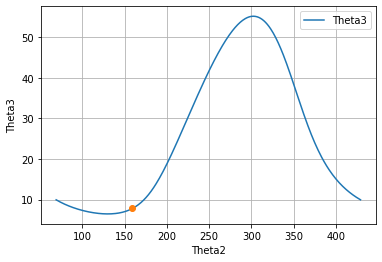

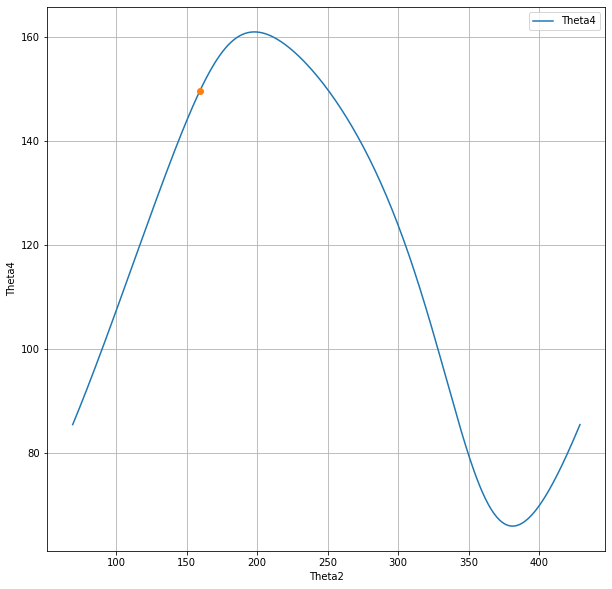

In [5]:
plt.figure()
plt.plot(np.rad2deg(th2v),np.rad2deg(th3v))
plt.rcParams['figure.figsize'] = [10, 10]
plt.legend(["Theta3"])
plt.xlabel("Theta2")
plt.ylabel("Theta3")
plt.plot(np.rad2deg(th2v[pos]),np.rad2deg(th3v[pos]),'o')
plt.grid()
plt.figure()
plt.plot(np.rad2deg(th2v),np.rad2deg(th4v))
plt.legend(["Theta4"])
plt.xlabel("Theta2")
plt.ylabel("Theta4")
plt.plot(np.rad2deg(th2v[pos]),np.rad2deg(th4v[pos]),'o')
plt.grid()

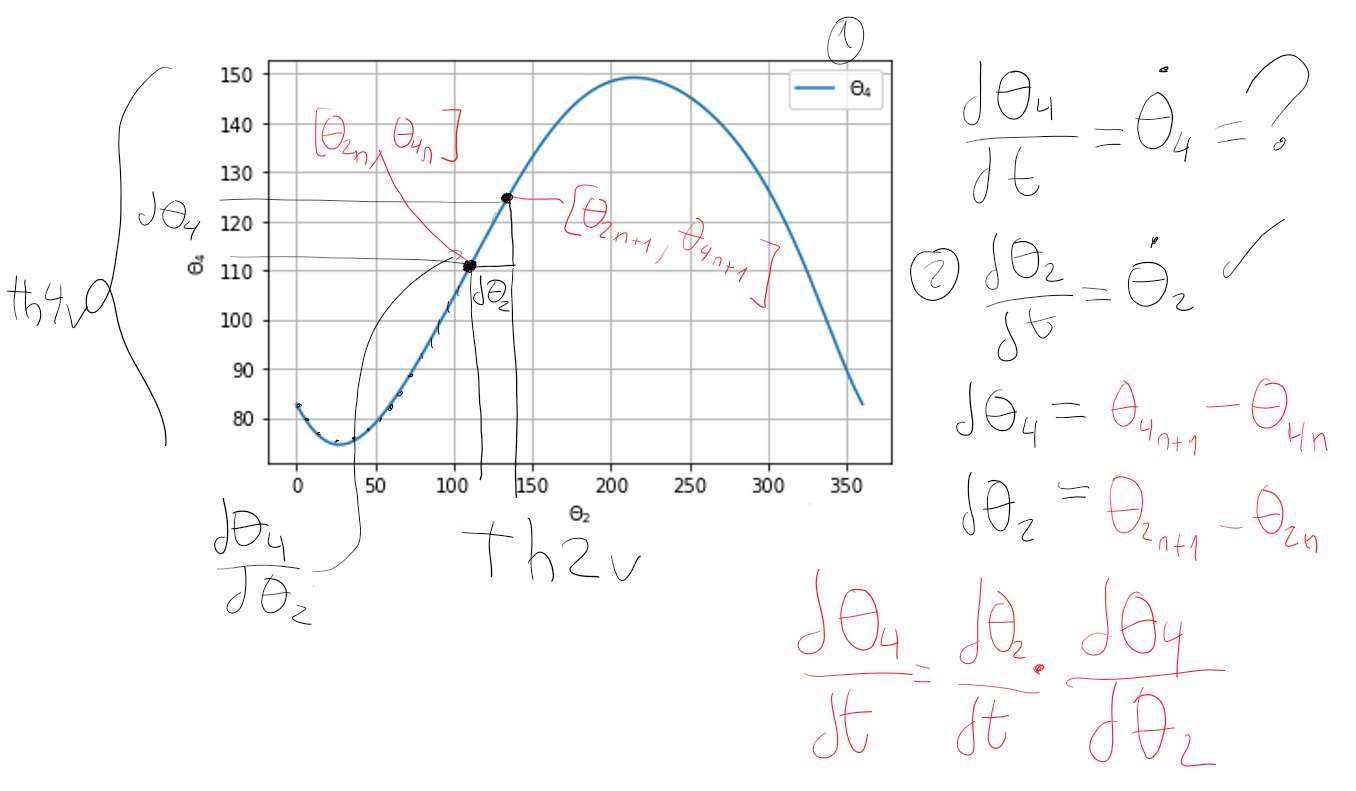



Tips para presentar mejor las gráficas: https://towardsdatascience.com/making-plots-in-jupyter-notebook-beautiful-more-meaningful-23c8a35c0d5d#:~:text=By%20default%2C%20the%20size%20of,images%20have%20even%20smaller%20dimensions.

In [8]:
difth3 = (th3v[pos+1]-th3v[pos-1])
difth2 = (th2v[pos+1]-th2v[pos-1])
dth3_th2 = difth3/difth2
difth4 = (th4v[pos+1]-th4v[pos-1])
dth4_th2 = difth4/difth2
#print(difth4)
th3pNum = dth3_th2 * th2p
th4pNum = dth4_th2 * th2p
print(th3p,th3pNum)
print(th4p,th4pNum)

0.6945201751950717 0.6947354390360853
3.5876747687240966 3.5872396383351295


## Análisis de velocidad para un rango de valores

Para resolver el análisis de velocidad, se requieren TODOS LOS VALORES de posición del mecanismo, es decir, las variables encontradas en el análisis anterior ($\theta_3$) y ($\theta_4)$. Para esto, debemos agregarle algo al ciclo ```for```

```python
for th2,th3,th4 in zip(th2v,th3v,th4v):
```

Con esto, obtenemos los valores de th2, th3 y th4 para cada posición del mecanismo **para cada iteración**

In [16]:
#Velocidad analitica
# th3pv=np.zeros(numpos)
# th4pv=np.zeros(numpos)
th3pv = []
th4pv = []

for th2,th3,th4 in zip(th2v,th3v,th4v):
    # velocidad
    am = [[-r3*np.sin(th3),r4*np.sin(th4)],
         [r3*np.cos(th3),-r4*np.cos(th4)]]
    bv = [r2*np.sin(th2)*th2p,
         -r2*np.cos(th2)*th2p]
    xv = np.linalg.solve(am,bv)
    th3pv.append(xv[0])
    th4pv.append(xv[1])
    print(f"th3p es {th3pv[-1]} y th4p es {th4pv[-1]} en th2 = {th2}")
    

th3p es -0.7567965270284853 y th4p es 4.101313550778127  en th2 = 1.2042771838760873
th3p es -0.7388067587210824 y th4p es 4.1345743496873375  en th2 = 1.2217790928097352
th3p es -0.7212696436335383 y th4p es 4.166639624233975  en th2 = 1.239281001743383
th3p es -0.7041669866026292 y th4p es 4.197546351340264  en th2 = 1.256782910677031
th3p es -0.6874811303773039 y th4p es 4.227329895006599  en th2 = 1.2742848196106789
th3p es -0.6711949372925523 y th4p es 4.256024053603295  en th2 = 1.2917867285443267
th3p es -0.6552917704239107 y th4p es 4.283661106286051  en th2 = 1.3092886374779744
th3p es -0.6397554743524033 y th4p es 4.310271858345182  en th2 = 1.3267905464116223
th3p es -0.6245703556490118 y th4p es 4.335885685330717  en th2 = 1.3442924553452702
th3p es -0.609721163170535 y th4p es 4.360530575821253  en th2 = 1.361794364278918
th3p es -0.5951930682434851 y th4p es 4.384233172727032  en th2 = 1.379296273212566
th3p es -0.5809716447990788 y th4p es 4.407018813037  en th2 = 1.3967

### Comprobación numérica para un rango de valores

Para hacer la derivada numérica para un rango de valores, nos apoyamos en la función ```gradient``` de *numpy*

In [17]:
#Velocidad numérica
th3pNumv=np.gradient(th3v,th2v)*th2p
th4pNumv=np.gradient(th4v,th2v)*th2p

## Gráficas de velocidad

Dado que estamos hayando la misma cantidad por medios diferentes, se debe obtener resultados casi idénticos en ambos casos.

Solo deben tener diferencias marcadas en dos puntos. ¿Cuales cree que son esos puntos? ¿Porqué?

3.000632335076432 271.93210434068243
-3.95109735232749 -348.4886816801231


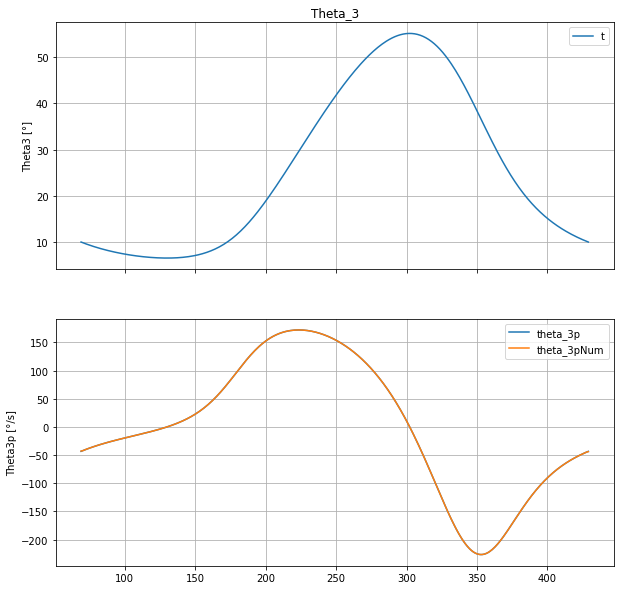

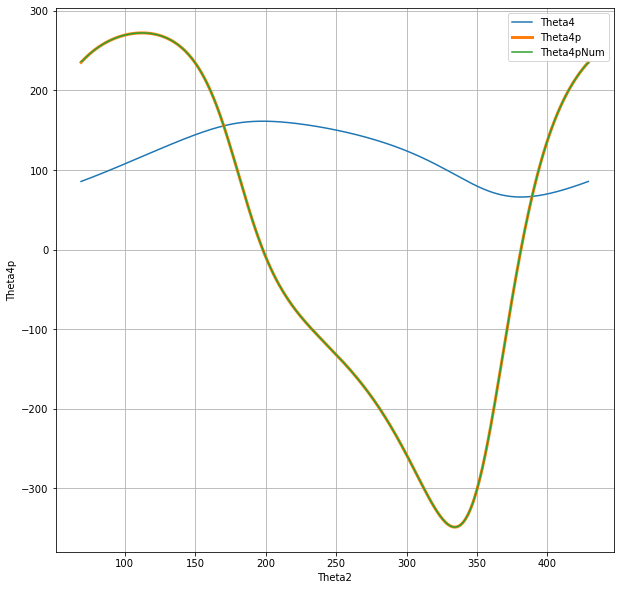

In [18]:
#con subplots

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(np.rad2deg(th2v),np.rad2deg(th3v))
ax1.set_title('Theta_3')
ax1.grid()
ax1.legend("theta_3")
ax1.set_ylabel("Theta3 [°]")
ax2.plot(np.rad2deg(th2v),np.rad2deg(th3pv))
ax2.plot(np.rad2deg(th2v),np.rad2deg(th3pNumv))
ax2.grid()
ax2.legend(["theta_3p","theta_3pNum"])
ax2.set_ylabel("Theta3p [°/s]")

#con una sola figura
plt.figure()
plt.plot(np.rad2deg(th2v),np.rad2deg(th4v))
plt.plot(np.rad2deg(th2v),np.rad2deg(th4pv),linewidth = 3)
plt.plot(np.rad2deg(th2v),np.rad2deg(th4pNumv))
plt.legend(["Theta4","Theta4p","Theta4pNum"])
plt.xlabel("Theta2")
plt.ylabel("Theta4p")
plt.grid()

print(max(th3pv),max(np.rad2deg(th4pv)))
print(min(th3pv),min(np.rad2deg(th4pv)))

## Análisis de aceleración

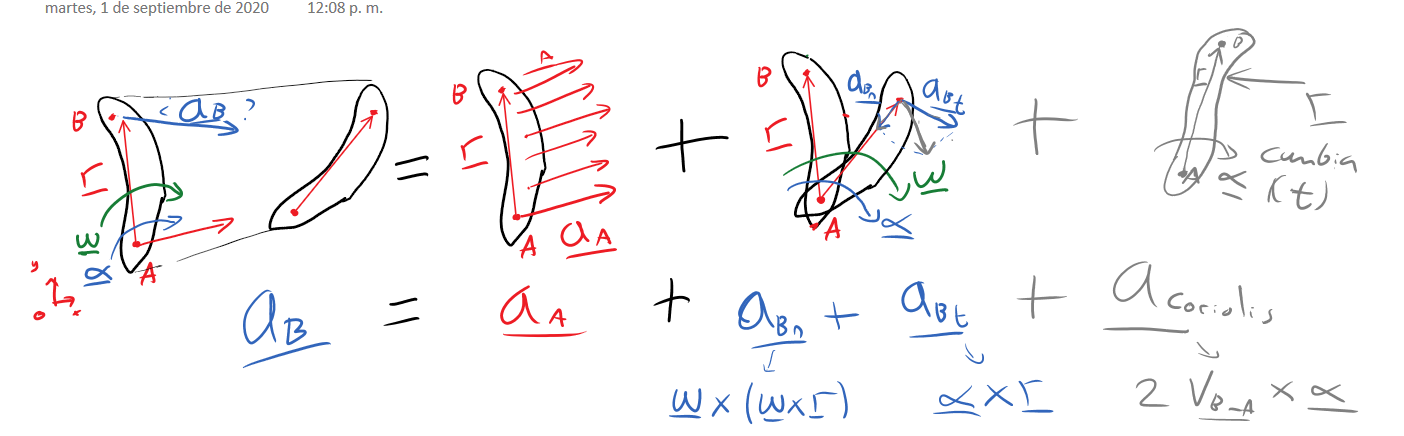

Aplicaremos la siguiente ecuación para modelar la velocidad de cada cuerpo rígido (barra) del mecanismo:

$\overrightarrow{a_B} = \overrightarrow{a_A}+\overrightarrow{a_{B_n}} + \overrightarrow{a_{B_t}} + \overrightarrow{a_{coriolis}}$, (8)

donde $\overrightarrow{a_{B_n}} = \overrightarrow{\omega}\times (\overrightarrow{\omega}\times\overrightarrow{r_{AB}})$, 

$\overrightarrow{a_{B_t}} = \overrightarrow{\alpha}\times \overrightarrow{r_{AB}}$ y

$\overrightarrow{a_{coriolis}} = 2\overrightarrow{V_{B-A}}\times\overrightarrow{\alpha}$.

De lo anterior, $\overrightarrow{\alpha}$ es el vector de aceleración angular del cuerpo, la componente $\overrightarrow{V_{B-A}}$ aparece si el punto $B$ se mueve con respecto al punto $A$.

Procedemos de manera similar al análisis de velocidad:

Usualmente no tenemos el valor de $\overrightarrow{\alpha}$, ya que las componentes escalares de esta son

$\overrightarrow{\alpha} = \begin{bmatrix}
0 & 0 & \ddot{\theta} 
\end{bmatrix}$ (9)

siendo $\ddot{\theta}$ la magnitud de la aceleración angular de la barra analizada. Esta cantidad la obtenemos derivando con respecto al tiempo las ecuaciones de velocidad (6) y (7).

### Aceleración de la barra de entrada

Si la barra analizada es una barra de entrada, la segunda derivada con respecto al tiempo de la variable de entrada asociada **debe ser conocida para poder completar el análisis**. Si la variable de entrada es un ángulo:

$\frac{\mathrm{d^2} \theta}{\mathrm{d} t^2} = \ddot{\theta}$

Si la variable de entrada es una distancia:

$\frac{\mathrm{d^2} r}{\mathrm{d} t^2} = \ddot{r}$

### Solución del sistema lineal

El método de solución es el mismo utilizado para hallar la velocidad. Revisar procedimiento en la parte superior

In [10]:
pos = 15 #posicion 15 de numpos posiciones
th2 = th2v[pos]
th3 = th3v[pos]
th4 = th4v[pos]
# La matriz A fue definida en el cálculo de la velocidad y es la misma
bv = [p['r2']*np.cos(th2)*th2p**2 + p['r3']*np.cos(th3)*th3p**2 - p['r4']*np.cos(th4)*th4p**2,
      p['r2']*np.sin(th2)*th2p**2 + p['r3']*np.sin(th3)*th3p**2 - p['r4']*np.sin(th4)*th4p**2]
xv = np.linalg.solve(am,bv) # el resultado de solve es el vector x
th3pp = xv[0]
th4pp = xv[1]

## Verificación numérica

Podemos hacer una verificación con base en el análisis de posición usando derivación numérica. Se procede de manera similar que con la verificación numérica para la velocidad. Sin embargo, tener precaución con aplicar regla de la cadena a una segunda derivada:

https://www.quora.com/What-is-the-chain-rule-of-second-derivative


## Análisis de aceleración para un rango de valores

In [11]:
th3ppv=np.zeros(numpos)
th4ppv=np.zeros(numpos)

for i in range(0,numpos):
    am = [[-p['r3']*np.sin(th3v[i]),p['r4']*np.sin(th4v[i])],
         [p['r3']*np.cos(th3v[i]),-p['r4']*np.cos(th4v[i])]]
    # aceleración
    #am se mantiene
    bv = [p['r2']*np.cos(th2v[i])*th2p**2 + p['r3']*np.cos(th3v[i])*th3pv[i]**2 - p['r4']*np.cos(th4v[i])*th4pv[i]**2,
          p['r2']*np.sin(th2v[i])*th2p**2 + p['r3']*np.sin(th3v[i])*th3pv[i]**2 - p['r4']*np.sin(th4v[i])*th4pv[i]**2]
    xv = np.linalg.solve(am,bv) # el resultado de solve es el vector x
    th3ppv[i] = xv[0]
    th4ppv[i] = xv[1]
    

### Comprobación numérica

In [12]:

# el segundo término de esta derivada se hace cero por th2pp = 0
th3ppNumv=np.gradient(np.gradient(th3v,th2v),th2v)*th2p**2
th4ppNumv=np.gradient(np.gradient(th4v,th2v),th2v)*th2p**2

print(th4ppv,th4ppNumv)

[ 6.14776976e+01  6.28926848e+01  6.41340822e+01  6.51985280e+01
  6.60843366e+01  6.67914725e+01  6.73214937e+01  6.76774670e+01
  6.78638580e+01  6.78864018e+01  6.77519563e+01  6.74683455e+01
  6.70441958e+01  6.64887701e+01  6.58118046e+01  6.50233510e+01
  6.41336279e+01  6.31528836e+01  6.20912720e+01  6.09587434e+01
  5.97649500e+01  5.85191672e+01  5.72302294e+01  5.59064810e+01
  5.45557395e+01  5.31852726e+01  5.18017847e+01  5.04114144e+01
  4.90197391e+01  4.76317876e+01  4.62520576e+01  4.48845380e+01
  4.35327349e+01  4.21996995e+01  4.08880578e+01  3.96000412e+01
  3.83375174e+01  3.71020207e+01  3.58947819e+01  3.47167570e+01
  3.35686550e+01  3.24509633e+01  3.13639729e+01  3.03078008e+01
  2.92824113e+01  2.82876356e+01  2.73231893e+01  2.63886893e+01
  2.54836680e+01  2.46075871e+01  2.37598492e+01  2.29398087e+01
  2.21467814e+01  2.13800529e+01  2.06388861e+01  1.99225277e+01
  1.92302137e+01  1.85611749e+01  1.79146408e+01  1.72898433e+01
  1.66860200e+01  1.61024

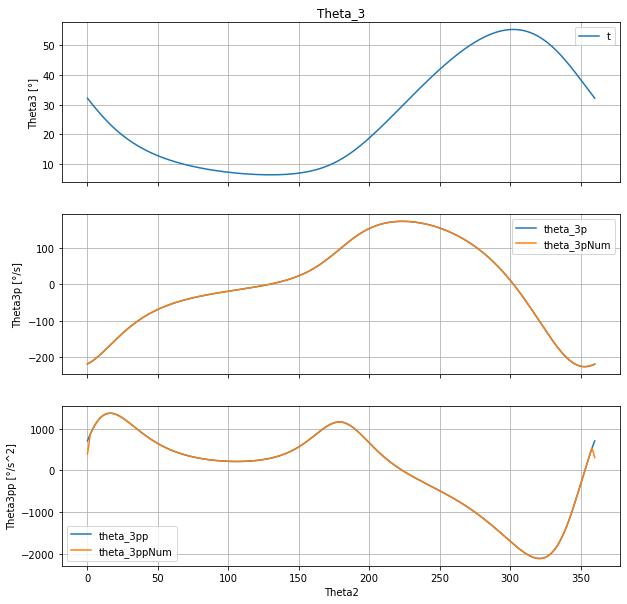

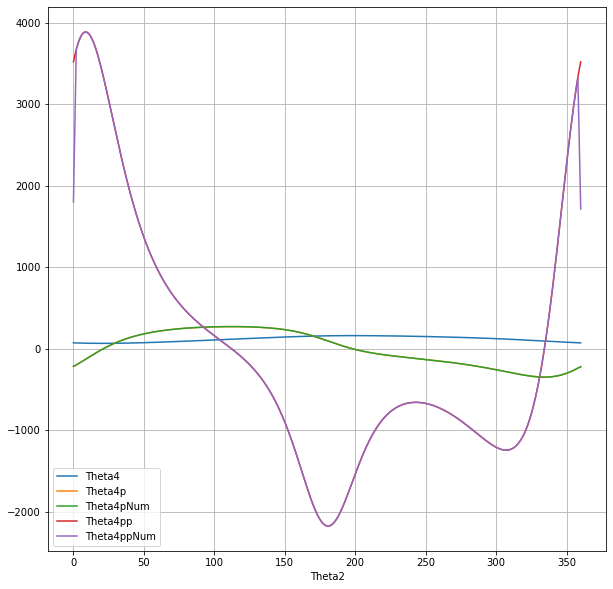

In [13]:
#con subplots

f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
ax1.plot(np.rad2deg(th2v),np.rad2deg(th3v))
ax1.set_title('Theta_3')
ax1.grid()
ax1.legend("theta_3")
ax1.set_ylabel("Theta3 [°]")
ax2.plot(np.rad2deg(th2v),np.rad2deg(th3pv))
ax2.plot(np.rad2deg(th2v),np.rad2deg(th3pNumv))
ax2.grid()
ax2.legend(["theta_3p","theta_3pNum"])
ax2.set_ylabel("Theta3p [°/s]")
ax3.plot(np.rad2deg(th2v),np.rad2deg(th3ppv))
ax3.plot(np.rad2deg(th2v),np.rad2deg(th3ppNumv))
ax3.grid()
ax3.legend(["theta_3pp","theta_3ppNum"])
ax3.set_xlabel("Theta2")
ax3.set_ylabel("Theta3pp [°/s^2]")

#con una sola figura
plt.figure()
plt.plot(np.rad2deg(th2v),np.rad2deg(th4v))
plt.plot(np.rad2deg(th2v),np.rad2deg(th4pv))
plt.plot(np.rad2deg(th2v),np.rad2deg(th4pNumv))
plt.plot(np.rad2deg(th2v),np.rad2deg(th4ppv))
plt.plot(np.rad2deg(th2v),np.rad2deg(th4ppNumv))
plt.legend(["Theta4","Theta4p","Theta4pNum","Theta4pp","Theta4ppNum"])
plt.xlabel("Theta2")
#plt.ylabel("Theta4")
plt.grid()

## Velocidad de un punto

Ahora si podemos usar la ecuación de velocidad de un punto de cualquier barra (4). 

Primero definamos los puntos que vamos a analizar:

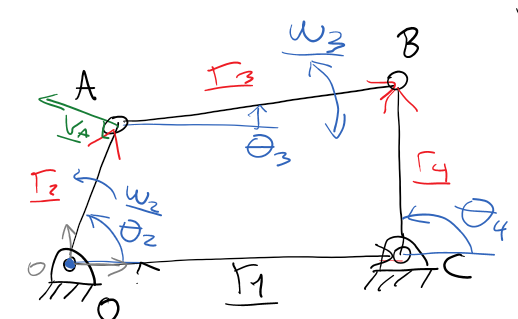

Ahora definamos cada elemento:

In [14]:
w2v = [0,0,th2p]
r2v = [p['r2']*np.cos(p['th2']),p['r2']*np.sin(p['th2']),0]
velA = np.cross(w2v,r2v)
print(velA)

[ 1.07725559e-13  4.39822972e+02 -0.00000000e+00]


El vector $\overrightarrow{V_A}$ tiene las componentes de la velocidad del punto A en mm/s

Ahora para calcular $\overrightarrow{V_B}$

In [15]:
w3v = [0,0,th3p]
r3v = [p['r3']*np.cos(th3),p['r3']*np.sin(th3),0]
velB = velA + np.cross(w3v,r3v)
print(velB)

[ 31.0335596  369.81804282   0.        ]


### Velocidad de un punto para un rango de valores

In [ ]:
#Velocidad analitica
velAm=np.zeros((numpos,3))  # La velocidad de los puntos es vectorial, por eso tiene 3 columnas
velBm=np.zeros((numpos,3))

for i in range(0,numpos):
    # se asume que ya calculó la primera derivada con respecto al tiempo de las var. secundarias
    # th3pv, th4pv
    # velocidad de puntos
    w2v = [0,0,th2p]
    r2v = [r2*np.cos(th2v[i]),r2*np.sin(th2v[i]),0]
    velA = np.cross(w2v,r2v)
    #print(velA)
    w3v = [0,0,th3pv[i]]
    r3v = [r3*np.cos(th3v[i]),r3*np.sin(th3v[i]),0]
    velB = velA + np.cross(w3v,r3v)
    #print(velB)
    velAm[i,:] = velA
    velBm[i,:] = velB


## Graficar vectores de velocidad

**nota sobre uso de plt.quiver:**
- scale_units='xy', para que el tamaño se ajuste en ambos ejes
- scale=4, cambia la escala para que las flechas quepan en el gráfico, a mayor el número, menor la escala
- color=(0,0,1,1), (Red,Green,Blue,alfa), tupla con valores de 0 a 1. Alfa es la transparencia de la flecha.

In [ ]:
# ## Ubicación de puntos para animación
Ox = 0
Oy = 0
Ax = r2*np.cos(th2v)
Ay = r2*np.sin(th2v)
Bx = Ax + r3*np.cos(th3v)
By = Ay + r3*np.sin(th3v)
Cx = r1*np.cos(th1)
Cy = r1*np.sin(th1)

# ## Preparación de animación
fig = plt.figure()
plt.rcParams['figure.figsize'] = [10, 5]
hr2 = plt.plot([Ox,Ax[pos]],[Oy,Ay[pos]])
hr3 = plt.plot([Bx[pos],Ax[pos]],[By[pos],Ay[pos]])
hr4 = plt.plot([Cx,Bx[pos]],[Cy,By[pos]])

hVA = plt.quiver(Ax[pos], Ay[pos], velA[0], velA[1],
                 scale_units='xy', scale=4, color=(0,0,1,1))
hVB = plt.quiver(Bx[pos], By[pos], velB[0], velB[1],
                 scale_units='xy', scale=4, color=(0,0,1,1))

plt.axis("scaled")
plt.xlim(-r2*2,np.amax(Bx)*2)
plt.ylim(-r2*2,r4*2)
plt.grid()
plt.draw() 

## Aceleración de un punto

Ahora si podemos usar la ecuación de aceleración de un punto de cualquier barra (8). 

Primero definamos los puntos que vamos a analizar:

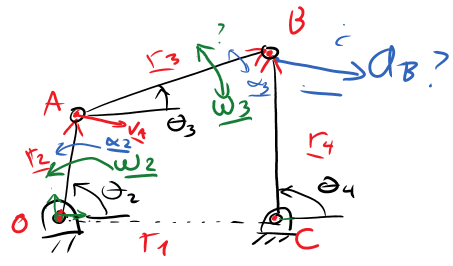

Ahora definamos los elementos que faltan:

In [ ]:
# lo que ya tenemos
print(r2v,w2v,r3v,w3v)
aAv = np.cross(w2v,np.cross(w2v,r2v))
aBnv = np.cross(w3v,np.cross(w3v,r3v))
alpha3 = [0,0,th3pp]
aBtv = np.cross(alpha3,r3v)
aBv = aAv + aBnv + aBtv
aBtv

## Análisis de aceleración de un punto para un rango de valores

In [ ]:
#Velocidad analitica
aAm=np.zeros((numpos,3))
aBm=np.zeros((numpos,3))
#print(aAm)
for i in range(0,numpos):
   # velocidad de puntos
    w2v = [0,0,th2p]
    r2v = [r2*np.cos(th2v[i]),r2*np.sin(th2v[i]),0]
    velA = np.cross(w2v,r2v)
    #print(velA)
    w3v = [0,0,th3pv[i]]
    r3v = [r3*np.cos(th3v[i]),r3*np.sin(th3v[i]),0]
    velB = velA + np.cross(w3v,r3v)
    #print(velB)
    velAm[i,:] = velA
    velBm[i,:] = velB
    
    # aceleración de puntos
    aAm[i,:] = np.cross(w2v,np.cross(w2v,r2v))
    aBnv = np.cross(w3v,np.cross(w3v,r3v))
    alpha3 = [0,0,th3pp]
    aBtv = np.cross(alpha3,r3v)
    aBm[i,:] = aAm[i,:] + aBnv + aBtv
    

## Graficar vectores de velocidad y aceleración

**nota sobre uso de plt.quiver:**
- scale_units='xy', para que el tamaño se ajuste en ambos ejes
- scale=4, cambia la escala para que las flechas quepan en el gráfico, a mayor el número, menor la escala
- color=(0,0,1,1), (Red,Green,Blue,alfa), tupla con valores de 0 a 1. Alfa es la transparencia de la flecha.

In [ ]:
# ## Ubicación de puntos para animación
Ox = 0
Oy = 0
Ax = r2*np.cos(th2v)
Ay = r2*np.sin(th2v)
Bx = Ax + r3*np.cos(th3v)
By = Ay + r3*np.sin(th3v)
Cx = r1*np.cos(th1)
Cy = r1*np.sin(th1)

# ## Preparación de animación
fig = plt.figure()
plt.rcParams['figure.figsize'] = [10, 5]
hr2 = plt.plot([Ox,Ax[pos]],[Oy,Ay[pos]])
hr3 = plt.plot([Bx[pos],Ax[pos]],[By[pos],Ay[pos]])
hr4 = plt.plot([Cx,Bx[pos]],[Cy,By[pos]])

hVA = plt.quiver(Ax[pos], Ay[pos], velA[0], velA[1],
                 scale_units='xy', scale=4, color=(0,0,1,1))
hVB = plt.quiver(Bx[pos], By[pos], velB[0], velB[1],
                 scale_units='xy', scale=4, color=(0,0,1,1))
haA = plt.quiver(Ax[pos], Ay[pos], aAv[0], aAv[1],
                 scale_units='xy', scale=25, color=(0,1,0,1))
haB = plt.quiver(Bx[pos], By[pos], aBv[0], aBv[1],
                 scale_units='xy', scale=25, color=(0,1,0,1))
# haBn = plt.quiver(Bx[pos], By[pos], aBnv[0], aBnv[1],
#                  scale_units='xy', scale=25, color=(1,0,0,0.5))
# haBt = plt.quiver(Bx[pos], By[pos], aBtv[0], aBtv[1],
#                  scale_units='xy', scale=25, color=(1,0,0,0.5))
# haA2 = plt.quiver(Bx[pos], By[pos], aAv[0], aAv[1],
#                  scale_units='xy', scale=25, color=(1,0,0,0.5))

plt.axis("scaled")
plt.xlim(-r2*2,np.amax(Bx)*2)
plt.ylim(-r2*2,r4*2)
plt.grid()
plt.draw() 

## Animación

Definimos la función que dibuja cada cuadro (plot)

In [ ]:
def animar(i):
    manivelaX = np.array([Ox,Ax[i]])
    manivelaY = np.array([Oy,Ay[i]])
    acopladorX = np.array([Bx[i],Ax[i]])
    acopladorY = np.array([By[i],Ay[i]])
    balancinX = np.array([Cx,Bx[i]])
    balancinY = np.array([Cy,By[i]])
    hr2[0].set_xdata(manivelaX)
    hr2[0].set_ydata(manivelaY)
    hr3[0].set_xdata(acopladorX)
    hr3[0].set_ydata(acopladorY)
    hr4[0].set_xdata(balancinX)
    hr4[0].set_ydata(balancinY)
    hVA.set_offsets([Ax[i], Ay[i]])
    hVA.set_UVC(velAm[i,0],velAm[i,1])
    hVB.set_offsets([Bx[i], By[i]])
    hVB.set_UVC(velBm[i,0],velBm[i,1])
    haA.set_offsets([Ax[i], Ay[i]])
    haA.set_UVC(aAm[i,0],aAm[i,1])
    haB.set_offsets([Bx[i], By[i]])
    haB.set_UVC(aBm[i,0],aBm[i,1])
    
    return hr2[0],hr3[0],hr4[0],hVA,hVB,haA,haB,

videoLength = 5000 # en milisegundos
maxFrames = 80

increment = int(np.ceil(numpos/maxFrames))
totalFrames = range(0,numpos,increment)
animacion = FuncAnimation(fig, 
                          animar, 
                          frames = totalFrames,
                          interval=videoLength/len(totalFrames),
                          save_count=len(totalFrames),
                          blit=True)

#En Jupyter se pueden mostrar las animaciones directamente en el cuaderno
from IPython.display import HTML

HTML(animacion.to_jshtml())

### EXTRA - Sympy: matemáticas simbólicas

Utilizaremos este módulo para realizar las derivadas simbólicas. Importamos el módulo básico y uno adicional para simplificar la notación de Newton

In [16]:
import sympy as sym
from sympy.physics.mechanics import dynamicsymbols, init_vprinting

sym.init_printing(use_unicode=False, wrap_line=True)
init_vprinting()

Ahora definimos el tiempo como variable independiente, luego todas las demás variables dependientes del tiempo

In [17]:
t = sym.Symbol('t')
r2s = sym.Symbol('r_2')
r3s = sym.Symbol('r_3')
r4s = sym.Symbol('r_4')
th2s, th3s, th4s = sym.symbols('theta_2 theta_3 theta_4', cls=sym.Function)
th2sp = sym.diff(th2s(t),t)
th3sp = sym.diff(th3s(t),t)
th4sp = sym.diff(th4s(t),t)
th2spp = sym.diff(th2s(t),t,t)
th3spp = sym.diff(th3s(t),t,t)
th4spp = sym.diff(th4s(t),t,t)


### Derivadas de las ecuaciones de posición

In [18]:
eq1 = r2s*sym.cos(th2s(t)) + r3s*sym.cos(th3s(t)) - r4s*sym.cos(th4s(t))
eq2 = r2s*sym.sin(th2s(t)) + r3s*sym.sin(th3s(t)) - r4s*sym.sin(th4s(t))
eq1 = sym.diff(eq1,t)
eq2 = sym.diff(eq2,t)
eq1,eq2

#### Expresando el sistema de ecuaciones en forma matricial

Para hacer esto debemos usar la función "linear_eq_to_matrix", el problema es que esta función no reconoce las derivadas como las incógnitas, hay que reemplazar las derivadas por símbolos para generar el sistema matricial

In [19]:
th2spsym, th3spsym, th4spsym = sym.symbols('\dot{\\theta_2} \dot{\\theta_3} \dot{\\theta_4}')
th2spsym,th3spsym,th4spsym

Podemos observar que estos símbolos son idénticos a las derivadas con respecto al tiempo, pero al definirlos de esta forma, para sympy no están relacionados con el tiempo (t).

Ahora solo debemos reemplazar usando la función "subs" de sympy.

In [20]:
eq1sym = eq1.subs([
                  (th2sp,th2spsym),
                  (th3sp,th3spsym),
                  (th4sp,th4spsym)
                   ])
eq2sym = eq2.subs([
                  (th2sp,th2spsym),
                  (th3sp,th3spsym),
                  (th4sp,th4spsym)
                   ])

eqns = [eq1sym,eq2sym]
As, bs = sym.linear_eq_to_matrix(eqns, [th3spsym,th4spsym])
As

⎡-r₃⋅sin(θ₃)  r₄⋅sin(θ₄) ⎤
⎢                        ⎥
⎣r₃⋅cos(θ₃)   -r₄⋅cos(θ₄)⎦

In [21]:
bs

⎡\dot{\theta_2}⋅r₂⋅sin(θ₂) ⎤
⎢                          ⎥
⎣-\dot{\theta_2}⋅r₂⋅cos(θ₂)⎦

Luego derivamos cada una de las expresiones de las ecuaciones (6) y (7) con respecto a t

In [22]:
a1 = sym.diff( r2s*sym.sin(th2s(t))*th2sp ,t)
b1 = sym.diff( r3s*sym.sin(th3s(t))*th3sp ,t)
c1 = sym.diff( r4s*sym.sin(th4s(t))*th4sp ,t)
a2 = sym.diff( r2s*sym.cos(th2s(t))*th2sp ,t)
b2 = sym.diff( r3s*sym.cos(th3s(t))*th3sp ,t)
c2 = sym.diff( r4s*sym.cos(th4s(t))*th4sp ,t)

### Derivadas de las ecuaciones de velocidad

Derivando (6) y (7) con respecto al tiempo usando el módulo de matemáticas simbólicas sympy, tenemos

In [23]:
eq1 = -a1-b1+c1
eq1

In [24]:
eq2 = a2+b2-c2
eq2

Al hacer clic derecho sobre las ecuaciones resultantes, se puede copiar el código TeX para usarlo abajo.

$-r_{2} \sin{\left(\theta_{2} \right)} \ddot{\theta}_{2} - r_{2} \cos{\left(\theta_{2} \right)} \dot{\theta}_{2}^{2} - r_{3} \sin{\left(\theta_{3} \right)} \ddot{\theta}_{3} - r_{3} \cos{\left(\theta_{3} \right)} \dot{\theta}_{3}^{2} + r_{4} \sin{\left(\theta_{4} \right)} \ddot{\theta}_{4} + r_{4} \cos{\left(\theta_{4} \right)} \dot{\theta}_{4}^{2}=0$, (10)

$- r_{2} \sin{\left(\theta_{2} \right)} \dot{\theta}_{2}^{2} + r_{2} \cos{\left(\theta_{2} \right)} \ddot{\theta}_{2} - r_{3} \sin{\left(\theta_{3} \right)} \dot{\theta}_{3}^{2} + r_{3} \cos{\left(\theta_{3} \right)} \ddot{\theta}_{3} + r_{4} \sin{\left(\theta_{4} \right)} \dot{\theta}_{4}^{2} - r_{4} \cos{\left(\theta_{4} \right)} \ddot{\theta}_{4}=0$. (11)

Podemos notar que este sistema de ecuaciones es LINEAL, por lo que podemos usar álgebra lineal para resolverlo. Para esto planteamos el sistema en forma matricial, específicamente de la forma $Ax=b$. En este caso

#### Expresando el sistema de ecuaciones en forma matricial

Para hacer esto debemos usar la función "linear_eq_to_matrix", el problema es que esta función no reconoce las derivadas como las incógnitas, hay que reemplazar las derivadas por símbolos para generar el sistema matricial

In [25]:
th2sppsym, th3sppsym, th4sppsym = sym.symbols('\ddot{\\theta_2} \ddot{\\theta_3} \ddot{\\theta_4}')
th2sppsym,th3sppsym,th4sppsym

Podemos observar que estos símbolos son idénticos a las derivadas con respecto al tiempo, pero al definirlos de esta forma, para sympy no están relacionados con el tiempo (t).

Ahora solo debemos reemplazar usando la función "subs" de sympy.

In [26]:
eq1sym = eq1.subs([
                  (th2spp,th2sppsym),
                  (th3spp,th3sppsym),
                  (th4spp,th4sppsym)
                   ])
eq2sym = eq2.subs([
                  (th2spp,th2sppsym),
                  (th3spp,th3sppsym),
                  (th4spp,th4sppsym)
                   ])

eqns = [eq1sym,eq2sym]
As, b2s = sym.linear_eq_to_matrix(eqns, [th3sppsym,th4sppsym])
As

⎡-r₃⋅sin(θ₃)  r₄⋅sin(θ₄) ⎤
⎢                        ⎥
⎣r₃⋅cos(θ₃)   -r₄⋅cos(θ₄)⎦

In [27]:
b2s

⎡                                          2                2                2
⎢\ddot{\theta_2}⋅r₂⋅sin(θ₂) + r₂⋅cos(θ₂)⋅θ₂̇  + r₃⋅cos(θ₃)⋅θ₃̇  - r₄⋅cos(θ₄)⋅θ
⎢                                                                             
⎢                                           2                2                
⎣-\ddot{\theta_2}⋅r₂⋅cos(θ₂) + r₂⋅sin(θ₂)⋅θ₂̇  + r₃⋅sin(θ₃)⋅θ₃̇  - r₄⋅sin(θ₄)⋅

 ⎤
₄̇  ⎥
 ⎥
2⎥
θ₄̇ ⎦

$A = \begin{bmatrix}-r_3sin(\theta_{3}) & r_4sin(\theta_{4})\\ 
r_3cos(\theta_{3}) & - r_4cos(\theta_{4})
\end{bmatrix}$,

$x = \begin{bmatrix}
\ddot{\theta_{3}}\\ 
\ddot{\theta_{4}}
\end{bmatrix}$ y

$b = \begin{bmatrix}
r_{2} \sin{\left(\theta_{2} \right)} \ddot{\theta}_{2} + r_{2} \cos{\left(\theta_{2} \right)} \dot{\theta}_{2}^{2}
+ r_{3} \cos{\left(\theta_{3} \right)} \dot{\theta}_{3}^{2} -
r_{4} \cos{\left(\theta_{4} \right)} \dot{\theta}_{4}^{2}\\ 
r_{2} \sin{\left(\theta_{2} \right)} \dot{\theta}_{2}^{2} - r_{2} \cos{\left(\theta_{2} \right)} \ddot{\theta}_{2} 
+ r_{3} \sin{\left(\theta_{3} \right)} \dot{\theta}_{3}^{2} - r_{4} \sin{\left(\theta_{4} \right)} \dot{\theta}_{4}^{2}
\end{bmatrix}$

### Variable de entrada

En este caso, la variable de entrada es $\theta_2$, por lo cual debemos dar valores a $\ddot{\theta_2}$. Como anteriormente asumimos una velocidad angular constante para la barra de entrada, $\ddot{\theta_2} = 0$. Simplificando

In [28]:
sym.simplify(eq1.subs(th2sp,3))

In [29]:
sym.simplify(eq2.subs(th2sp,3))

### Solución del sistema lineal para aceleración

#### Reemplazando las matrices obtenidas con Sympy

Para evaluar una expresión simbólica debemos usar la función "lambdify". Para esto: 
1. creamos una lista con los símbolos que queremos reemplazar por números, 
2. luego creamos una función usando sym.lambdify que evalua dichos símbolos de la expresión a evaluar (en este caso As y bs), 
3. por último llamamos a la función creada especificando los valores numéricos a utilizar. 

El resutlado es la expresión simbólica evaluada en esos números

In [30]:
# igual hay que reemplazar los términos que tengan derivadas, ya que lambdify no los reconoce.
b2s = b2s.subs([
               (th2sp,th2spsym),
               (th3sp,th3spsym),
               (th4sp,th4spsym)
                ])
varb = [th2sppsym,r2s,r3s,r4s,th3s(t),th3spsym,th4s(t),th4spsym,th2s(t),th2spsym]
b2_func = sym.lambdify(varb, b2s, modules='numpy')
bv = b2_func(0,r2,r3,r4,th3,th3p,th4,th4p,th2,th2p).reshape(2) # reshape para que quede como vector de una dimensión y no saque warnings.

print(am,bv)
[th3pp,th4pp] = np.linalg.solve(am,bv) # el resultado de solve es el vector x
print(th3pp,th4pp)


NameError: name 'r2' is not defined